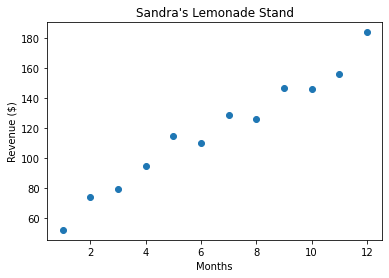

In [1]:
import matplotlib.pyplot as plt

months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
revenue = [52, 74, 79, 95, 115, 110, 129, 126, 147, 146, 156, 184]

plt.plot(months, revenue, "o")

plt.title("Sandra's Lemonade Stand")

plt.xlabel("Months")
plt.ylabel("Revenue ($)")

plt.show()


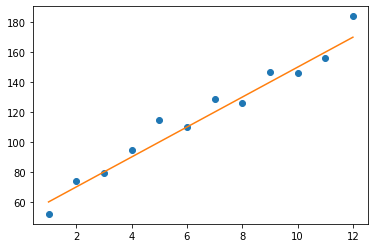

In [2]:
months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
revenue = [52, 74, 79, 95, 115, 110, 129, 126, 147, 146, 156, 184]

#slope:
m = 10
#intercept:
b = 50
y = [(m * x + b) for x in months]
plt.plot(months, revenue, "o")
plt.plot(months, y)

plt.show()


##### Loss

In [3]:
x = [1, 2, 3]
y = [5, 1, 3]

#y = x
m1 = 1
b1 = 0

#y = 0.5x + 1
m2 = 0.5
b2 = 1
y_predicted1 = [(m1 * i + b1) for i in x ]
y_predicted2 = [(m2 * i + b2) for i in x]
total_loss1 = 0
for i in range(len(y)):
  diff = y[i] - y_predicted1[i]
  diff = diff ** 2
  total_loss1 += diff

total_loss2 = 0
for i in range(len(y)):
  diff = y[i] - y_predicted2[i]
  diff = diff ** 2
  total_loss2 += diff

print(total_loss1)
print(total_loss2)

better_fit = 2

17
13.5


##### Gradient Descent for Intercept

In [5]:
def get_gradient_at_b(x, y, m, b):
    diff = 0
    for i in range(len(x)):
        t = y[i] - (m * x[i] + b )
        diff += t
    N = len(x)
    b_gradient = -2/N * diff
    return b_gradient 

##### Gradient Descent for Slope

In [6]:
def get_gradient_at_m(x, y, m, b):
    N = len(x)
    diff  = 0
    for i in range(len(x)):
        diff += x[i] * (y[i] - (m * x[i] + b))
        m_gradient = -2/N * diff
    return m_gradient

##### Putting it Together

In [7]:
def step_gradient(x, y, b_current, m_current):
    b_gradient = get_gradient_at_b(x, y, b_current, m_current)
    m_gradient = get_gradient_at_m(x, y, b_current, m_current)
    b = b_current - (0.01 * b_gradient)
    m = m_current - (0.01 * m_gradient)
    return [b, m]

months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
revenue = [52, 74, 79, 95, 115, 110, 129, 126, 147, 146, 156, 184]

# current intercept guess:
b = 0
# current slope guess:
m = 0

# Call your function here to update b and m
b, m = step_gradient(months, revenue, b, m)
print(b, m)

2.355 17.78333333333333
